2025-08-12 13:38:00.177632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755005880.527536      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755005880.624939      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Found 15000 images belonging to 3 classes.


I0000 00:00:1755006055.442072      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755006055.442796      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1755006060.335355     121 service.cc:148] XLA service 0x7a6fd400ec10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755006060.337065     121 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755006060.337092     121 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755006060.812054     121 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/375 ━━━━━━━━━━━━━━━━━━━━ 1:28:06 14s/step - accuracy: 0.2812 - loss: 1.3970

I0000 00:00:1755006072.104849     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 99s 228ms/step - accuracy: 0.7765 - loss: 0.8506 - val_accuracy: 0.9260 - val_loss: 0.2044
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 89s 236ms/step - accuracy: 0.8963 - loss: 0.2710 - val_accuracy: 0.9297 - val_loss: 0.1867
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 91s 242ms/step - accuracy: 0.9088 - loss: 0.2243 - val_accuracy: 0.9393 - val_loss: 0.1464
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 245ms/step - accuracy: 0.9160 - loss: 0.2105 - val_accuracy: 0.9453 - val_loss: 0.1391
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 91s 244ms/step - accuracy: 0.9163 - loss: 0.2006 - val_accuracy: 0.9443 - val_loss: 0.1500
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 244ms/step - accuracy: 0.9282 - loss: 0.1734 - val_accuracy: 0.9427 - val_loss: 0.1371
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 245ms/step - accuracy: 0.9240 - loss: 0.1748 - val_accuracy: 0.9550 - val_loss: 0.1157
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 246ms/step - accuracy: 0.9333 - loss: 0.1519 - val

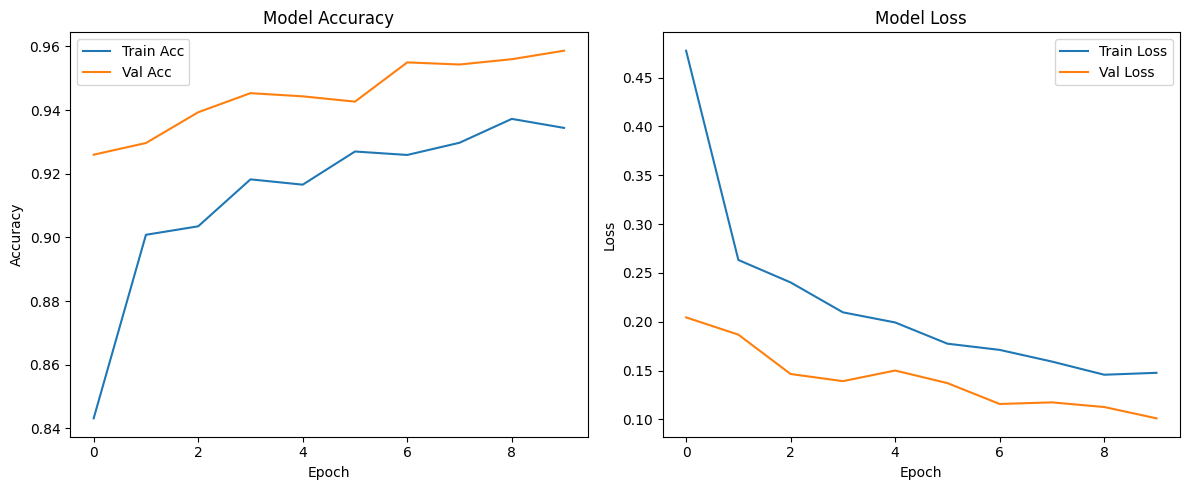

469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 195ms/step
📊 Classification Report:

              precision    recall  f1-score   support

brain_glioma       0.99      0.97      0.98      5000
 brain_menin       0.96      0.97      0.97      5000
 brain_tumor       0.98      0.99      0.98      5000

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



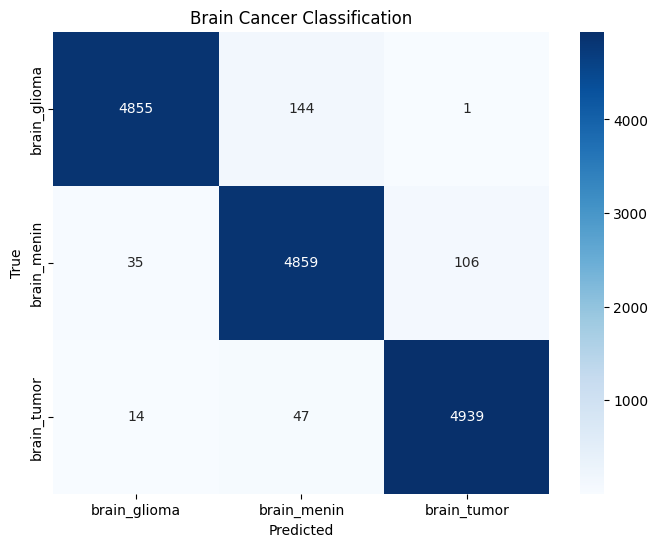

In [1]:
# Importing required libraries
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# 1: Defining the original dataset path
original_path = "/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer/Brain Cancer"

# 2: Copying dataset to a writable directory (if not already present)
base_path = "/kaggle/working/brain_cancer_data"
if not os.path.exists(base_path):
    shutil.copytree(original_path, base_path)

# 3: Using ImageDataGenerator to load and split the images
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation and test
)

# Training generator (80%)
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Validation generator (10%)
validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Create a separate generator for the test set (10%)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 4: Defining the VGG16 model architecture
# Load the VGG16 model, pre-trained on ImageNet, without the top classification layers
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

# Freeze the convolutional base
conv_base.trainable = False

# Add a new classification head
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# 5: Compiling the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6: Training the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# 7: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")

# 8: Plot training/validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 9: Confusion Matrix and Classification Report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Brain Cancer Classification")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()